# Exploratory data analysis:

In this notebook I will dissect the amino acid sequences into several features and add those features into the description.

From the feature construction I will inspect the relationship between the features amongst the observations in the scope of whether there is a pattern in the protein features and the interactions.

The data being examined is a wrangling of two csv files containing amino acid sequences between two proteins and whether or not those proteins interact with each other.

The data is coming from kaggle https://www.kaggle.com/datasets/spandansureja/ppi-dataset?resource=download





1.) Develop residue analysis feature creator

2.) Visualization of residue composition

3.) Inferential Statistics: Pearson correlation, Chi Square test, t-test hypothesis testing

4.) PCA

## Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import requests
import ydata_profiling
from ydata_profiling.utils.cache import cache_file
from pathlib import Path

In [2]:
df = pd.read_csv('complete.csv')

In [3]:
df.head()

,Unnamed: 0,protein_sequences_1,protein_sequences_2,protein_interaction
0,0,MESSKKMDSPGALQTNPPLKLHTDRSAGTPVFVPEQGGYKEKFVKT...,MARPHPWWLCVLGTLVGLSATPAPKSCPERHYWAQGKLCCQMCEPG...,1
1,1,MVMSSYMVNSKYVDPKFPPCEEYLQGGYLGEQGADYYGGGAQGADF...,MAENVVEPGPPSAKRPKLSSPALSASASDGTDFGSLFDLEHDLPDE...,1
2,2,MNRHLWKSQLCEMVQPSGGPAADQDVLGEESPLGKPAMLHLPSEQG...,MEGGRRARVVIESKRNFFLGAFPTPFPAEHVELGRLGDSETAMVPG...,1
3,3,MAPPSTREPRVLSATSATKSDGEMVLPGFPDADSFVKFALGSVVAV...,MLFYSFFKSLVGKDVVVELKNDLSICGTLHSVDQYLNIKLTDISVT...,1
4,4,MQSGPRPPLPAPGLALALTLTMLARLASAASFFGENHLEVPVATAL...,MQTIKCVVVGDGAVGKTCLLISYTTNKFPSEYVPTVFDNYAVTVMI...,1


In [4]:
df =df.drop(columns= 'Unnamed: 0')

In [5]:
df.describe()

,protein_interaction
count,73110.000000
mean,0.501026
std,0.500002
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


## 1.) Residue analysis feature creator

## produce a function that splits each amino acid residue in the sequences, then sorts the residue into count dictionaries for each amino acid

## https://wou.edu/chemistry/courses/online-chemistry-textbooks/ch450-and-ch451-biochemistry-defining-life-at-the-molecular-level/chapter-2-protein-structure/

using this site for the classifications of amino acids between hydrophobic and hydrophilic

In [42]:
def seq_features(df):
    
    structure = {'protein_1_seq':'p', 'protein_1_len':'p', '1_phobic_count':'p', '1_philic_count':'p', '1_basic_count': 'p', '1_acidic_count': 'p', '1_aromatic_count':'p', '1_sulfur_count': 'p', 'protein_2_seq':'p', 'protein_2_len':'p', '2_phobic_count':'p', '2_philic_count':'p', '2_basic_count': 'p', '2_acidic_count': 'p', '2_aromatic_count':'p', '2_sulfur_count': 'p'}
    new_df = pd.DataFrame(data=structure, index=[0])
    
    for x in range(len(df)):
        
        p1_list = []
        p2_list = []
        
        for i in range(2):
            
            amino_acids = ['A','C','D','E','F','G','H','I','K','L','M','N','P','Q', 'R','S','T','V','W','Y']
    
            ind_counts = {}
            for a in amino_acids:
                ind_counts[a] = 0

            phobic = {'A':0, 'F':0, 'G':0, 'I':0, 'L':0, 'M':0, 'P':0, 'V':0, 'W':0, 'Y':0, 'phobic_total':0}
            philic = {'C':0, 'D':0, 'E':0, 'H':0, 'K':0, 'N':0, 'Q':0, 'R':0, 'S':0, 'T':0, 'philic_total':0}
            basic = {'H':0, 'K':0, 'R':0, 'basic_total':0}
            acidic = {'D':0, 'E':0, 'acidic_total':0}
            aromatic = {'F':0, 'H':0, 'W':0, 'Y':0, 'aromatic_total':0}
            sulfur = {'C':0 , 'M':0, 'sulfur_total':0}
            
            
            seq = df.iloc[x, i]
            seq_split = [y for y in seq]
            seq_len = len(seq_split)
            
            for z in seq_split:
                
                if z in ind_counts:
                    ind_counts[z] += 1
                    
                if z in phobic:
                    phobic[z] += 1
                    phobic['phobic_total'] += 1
                    
                if z in philic:
                    philic[z] += 1
                    philic['philic_total'] += 1
                    
                if z in basic:
                    basic[z] += 1
                    basic['basic_total'] += 1
                    
                if z in acidic:
                    acidic[z] += 1
                    acidic['acidic_total'] += 1
                    
                if z in aromatic:
                    aromatic[z] += 1
                    aromatic['aromatic_total'] += 1
                    
                if z in sulfur:
                    sulfur[z] += 1
                    sulfur['sulfur_total'] += 1
                    
                    
            if i == 0:
                
                p1_list = [seq, seq_len, phobic['phobic_total'], philic['philic_total'], basic['basic_total'], acidic['acidic_total'], aromatic['aromatic_total'], sulfur['sulfur_total']]
                
            elif i != 0:
                
                p2_list = [seq, seq_len, phobic['phobic_total'], philic['philic_total'], basic['basic_total'], acidic['acidic_total'], aromatic['aromatic_total'], sulfur['sulfur_total']]
                
        tot_list = p1_list + p2_list
        col_list = [k for k,v in structure.items()]
        
        moving_dict = dict(zip(col_list, tot_list))
        
        moving_df = pd.DataFrame(data = moving_dict, index= [0])
        
        new_df = pd.concat([new_df, moving_df], axis = 0)
        
        
    return new_df
                    

In [43]:
df_fe = seq_features(df)

In [44]:
df_fe.head()

,protein_1_seq,protein_1_len,1_phobic_count,1_philic_count,1_basic_count,1_acidic_count,1_aromatic_count,1_sulfur_count,protein_2_seq,protein_2_len,2_phobic_count,2_philic_count,2_basic_count,2_acidic_count,2_aromatic_count,2_sulfur_count
0,p,p,p,p,p,p,p,p,p,p,p,p,p,p,p,p
0,MESSKKMDSPGALQTNPPLKLHTDRSAGTPVFVPEQGGYKEKFVKT...,568,243,325,98,73,56,44,MARPHPWWLCVLGTLVGLSATPAPKSCPERHYWAQGKLCCQMCEPG...,260,120,140,40,25,30,26
0,MVMSSYMVNSKYVDPKFPPCEEYLQGGYLGEQGADYYGGGAQGADF...,255,136,119,39,20,32,10,MAENVVEPGPPSAKRPKLSSPALSASASDGTDFGSLFDLEHDLPDE...,2414,1189,1225,277,178,170,169
0,MNRHLWKSQLCEMVQPSGGPAADQDVLGEESPLGKPAMLHLPSEQG...,419,175,244,71,73,23,23,MEGGRRARVVIESKRNFFLGAFPTPFPAEHVELGRLGDSETAMVPG...,538,252,286,77,87,53,30
0,MAPPSTREPRVLSATSATKSDGEMVLPGFPDADSFVKFALGSVVAV...,885,424,461,143,114,92,32,MLFYSFFKSLVGKDVVVELKNDLSICGTLHSVDQYLNIKLTDISVT...,95,47,48,13,12,10,4


In [45]:
df_fe.shape

(73111, 16)

In [47]:
df_fe = df_fe.reset_index(drop=True)

In [49]:
df_fe =df_fe.drop(index=[0])

In [200]:
df_fe = df_fe.reset_index(drop=True)

In [201]:
df_fe.head()

,protein_1_seq,protein_1_len,1_phobic_count,1_philic_count,1_basic_count,1_acidic_count,1_aromatic_count,1_sulfur_count,protein_2_seq,protein_2_len,2_phobic_count,2_philic_count,2_basic_count,2_acidic_count,2_aromatic_count,2_sulfur_count
0,MESSKKMDSPGALQTNPPLKLHTDRSAGTPVFVPEQGGYKEKFVKT...,568,243,325,98,73,56,44,MARPHPWWLCVLGTLVGLSATPAPKSCPERHYWAQGKLCCQMCEPG...,260,120,140,40,25,30,26
1,MVMSSYMVNSKYVDPKFPPCEEYLQGGYLGEQGADYYGGGAQGADF...,255,136,119,39,20,32,10,MAENVVEPGPPSAKRPKLSSPALSASASDGTDFGSLFDLEHDLPDE...,2414,1189,1225,277,178,170,169
2,MNRHLWKSQLCEMVQPSGGPAADQDVLGEESPLGKPAMLHLPSEQG...,419,175,244,71,73,23,23,MEGGRRARVVIESKRNFFLGAFPTPFPAEHVELGRLGDSETAMVPG...,538,252,286,77,87,53,30
3,MAPPSTREPRVLSATSATKSDGEMVLPGFPDADSFVKFALGSVVAV...,885,424,461,143,114,92,32,MLFYSFFKSLVGKDVVVELKNDLSICGTLHSVDQYLNIKLTDISVT...,95,47,48,13,12,10,4
4,MQSGPRPPLPAPGLALALTLTMLARLASAASFFGENHLEVPVATAL...,2322,1315,1007,242,257,220,38,MQTIKCVVVGDGAVGKTCLLISYTTNKFPSEYVPTVFDNYAVTVMI...,191,99,92,25,24,18,8


In [202]:
df_fe.shape

(73110, 16)

In [203]:
df_fe_classed = pd.concat([df_fe, df['protein_interaction']], axis=1)

In [204]:
df_fe_classed.tail()

,protein_1_seq,protein_1_len,1_phobic_count,1_philic_count,1_basic_count,1_acidic_count,1_aromatic_count,1_sulfur_count,protein_2_seq,protein_2_len,2_phobic_count,2_philic_count,2_basic_count,2_acidic_count,2_aromatic_count,2_sulfur_count,protein_interaction
73105,MERFVVTAPPARNRSKTALYVTPLDRVTEFGGELHEDGGKLFCTSC...,167,70,97,32,20,15,7,MLGMIKNSLFGSVETWPWQVLSKGDKEEVAYEERACEGGKFATVEV...,189,105,84,25,26,21,9,0
73106,MAAGKSGGSAGEITFLEALARSESKRDGGFKNNWSFDHEEESEGDT...,1112,457,655,180,164,99,39,MSSASGLRRGHPAGGEENMTETDAFYKREMFDPAEKYKMDHRRRGI...,293,142,151,49,40,42,17,0
73107,MQAQQYQQQRRKFAAAFLAFIFILAAVDTAEAGKKEKPEKKVKKSD...,168,67,101,37,17,13,13,MPRGRKSRRRRNARAAEENRNNRKIQASEASETPMAASVVASTPED...,219,105,114,36,29,19,8,0
73108,MNQPQRMAPVGTDKELSDLLDFSMMFPLPVTNGKGRPASLAGAQFG...,654,344,310,80,69,57,15,MVPALRYLVGACGRARGRFAGGSPGACGFASGRPRPLCGGSRSAST...,463,268,195,59,46,46,21,0
73109,MSATGPISNYYVDSLISHDNEDLLASRFPATGAHPAAARPSGLVPD...,260,133,127,43,29,34,11,MSDYENDDECWSVLEGFRVTLTSVIDPSRITPYLRQCKVLNPDDEE...,536,222,314,101,100,34,22,0


In [205]:
df_fe_classed.describe()

,protein_interaction
count,73110.000000
mean,0.501026
std,0.500002
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [206]:
df_fe_classed.dtypes

protein_1_seq          object
protein_1_len          object
1_phobic_count         object
1_philic_count         object
1_basic_count          object
1_acidic_count         object
1_aromatic_count       object
1_sulfur_count         object
protein_2_seq          object
protein_2_len          object
2_phobic_count         object
2_philic_count         object
2_basic_count          object
2_acidic_count         object
2_aromatic_count       object
2_sulfur_count         object
protein_interaction     int64
dtype: object

In [207]:
structure = {'protein_1_seq':'p', 'protein_1_len':'p', '1_phobic_count':'p', '1_philic_count':'p', '1_basic_count': 'p', '1_acidic_count': 'p', '1_aromatic_count':'p', '1_sulfur_count': 'p', 'protein_2_seq':'p', 'protein_2_len':'p', '2_phobic_count':'p', '2_philic_count':'p', '2_basic_count': 'p', '2_acidic_count': 'p', '2_aromatic_count':'p', '2_sulfur_count': 'p'}

In [208]:
excl_list = ['protein_1_seq', 'protein_2_seq']
conv_list = [k for k,v in structure.items() if  k not in excl_list]

In [209]:
print (len(conv_list))

14


In [210]:
int_list = []
for x in range(14):
    int_list.append('int64')

In [211]:
type_dict = dict(zip(conv_list, int_list))

In [212]:
df_fe_classed.head()

,protein_1_seq,protein_1_len,1_phobic_count,1_philic_count,1_basic_count,1_acidic_count,1_aromatic_count,1_sulfur_count,protein_2_seq,protein_2_len,2_phobic_count,2_philic_count,2_basic_count,2_acidic_count,2_aromatic_count,2_sulfur_count,protein_interaction
0,MESSKKMDSPGALQTNPPLKLHTDRSAGTPVFVPEQGGYKEKFVKT...,568,243,325,98,73,56,44,MARPHPWWLCVLGTLVGLSATPAPKSCPERHYWAQGKLCCQMCEPG...,260,120,140,40,25,30,26,1
1,MVMSSYMVNSKYVDPKFPPCEEYLQGGYLGEQGADYYGGGAQGADF...,255,136,119,39,20,32,10,MAENVVEPGPPSAKRPKLSSPALSASASDGTDFGSLFDLEHDLPDE...,2414,1189,1225,277,178,170,169,1
2,MNRHLWKSQLCEMVQPSGGPAADQDVLGEESPLGKPAMLHLPSEQG...,419,175,244,71,73,23,23,MEGGRRARVVIESKRNFFLGAFPTPFPAEHVELGRLGDSETAMVPG...,538,252,286,77,87,53,30,1
3,MAPPSTREPRVLSATSATKSDGEMVLPGFPDADSFVKFALGSVVAV...,885,424,461,143,114,92,32,MLFYSFFKSLVGKDVVVELKNDLSICGTLHSVDQYLNIKLTDISVT...,95,47,48,13,12,10,4,1
4,MQSGPRPPLPAPGLALALTLTMLARLASAASFFGENHLEVPVATAL...,2322,1315,1007,242,257,220,38,MQTIKCVVVGDGAVGKTCLLISYTTNKFPSEYVPTVFDNYAVTVMI...,191,99,92,25,24,18,8,1


In [213]:
df_fe_classed.shape

(73110, 17)

In [214]:
df_fe_classed = df_fe_classed.astype(type_dict)

In [215]:
df_fe_classed.dtypes

protein_1_seq          object
protein_1_len           int64
1_phobic_count          int64
1_philic_count          int64
1_basic_count           int64
1_acidic_count          int64
1_aromatic_count        int64
1_sulfur_count          int64
protein_2_seq          object
protein_2_len           int64
2_phobic_count          int64
2_philic_count          int64
2_basic_count           int64
2_acidic_count          int64
2_aromatic_count        int64
2_sulfur_count          int64
protein_interaction     int64
dtype: object

In [216]:
df_fe_classed.describe()

,protein_1_len,1_phobic_count,1_philic_count,1_basic_count,1_acidic_count,1_aromatic_count,1_sulfur_count,protein_2_len,2_phobic_count,2_philic_count,2_basic_count,2_acidic_count,2_aromatic_count,2_sulfur_count,protein_interaction
count,73110.000000,73110.000000,73110.000000,73110.000000,73110.000000,73110.000000,73110.000000,73110.000000,73110.000000,73110.000000,73110.000000,73110.000000,73110.000000,73110.000000,73110.000000
mean,622.640405,302.293325,320.347039,89.859171,77.635111,59.058898,26.478772,582.975831,289.114417,293.859198,81.664547,74.075161,56.682451,25.351853,0.501026
std,697.028588,337.818133,364.455571,101.529708,96.610424,61.634979,29.623921,652.549446,317.393788,339.597700,91.916066,89.872794,60.120223,28.544362,0.500002
min,24.000000,6.000000,10.000000,2.000000,0.000000,0.000000,1.000000,24.000000,10.000000,10.000000,2.000000,0.000000,0.000000,1.000000,0.000000
25%,305.000000,152.000000,148.000000,43.000000,34.000000,28.000000,11.000000,274.000000,140.000000,133.000000,38.000000,33.000000,26.000000,11.000000,0.000000
50%,465.000000,228.000000,235.000000,66.000000,56.000000,47.000000,19.000000,432.000000,222.000000,212.000000,62.000000,53.000000,44.000000,19.000000,1.000000
75%,743.000000,357.000000,387.000000,109.000000,93.000000,74.000000,32.000000,708.000000,345.000000,358.000000,101.000000,91.000000,69.000000,31.000000,1.000000
max,33423.000000,16370.000000,17053.000000,4965.000000,4756.000000,2786.000000,883.000000,33423.000000,16370.000000,17053.000000,4965.000000,4756.000000,2786.000000,883.000000,1.000000


In [217]:
df_fe_classed.to_csv('feature_engineered.csv')

Mandatory NAN check

In [218]:
df_fe_classed.isna().sum()

protein_1_seq          0
protein_1_len          0
1_phobic_count         0
1_philic_count         0
1_basic_count          0
1_acidic_count         0
1_aromatic_count       0
1_sulfur_count         0
protein_2_seq          0
protein_2_len          0
2_phobic_count         0
2_philic_count         0
2_basic_count          0
2_acidic_count         0
2_aromatic_count       0
2_sulfur_count         0
protein_interaction    0
dtype: int64

# 2.) Composition Visualization

## if resuming from this position use the cell below:

In [7]:
df_fe_classed = pd.read_csv('feature_engineered.csv')

In [9]:
df_fe_classed = df_fe_classed.drop(columns='Unnamed: 0')

In [12]:
df_fe_classed = df_fe_classed.rename(columns={'protein_1_len':'1_protein_len', 'protein_2_len':'2_protein_len'})

In [13]:
one_indexes = []
for x in range(len(df)):
    if df['protein_interaction'][x] == 1:
        one_indexes.append(x)

In [14]:
zero_indexes = []
for x in range(len(df)):
    if df['protein_interaction'][x] == 0:
        zero_indexes.append(x)

In [17]:
def histogrammer(df):
    
    col_names = list(df.columns)

    
    for x in range(7):
        fig, (ax1, ax2) = plt.subplots(2, figsize=(8,8), sharex=True, sharey=True)

        ax1.set_title(f'{col_names[x+1][2:]}')
        ax1.hist(pd.concat([df_fe_classed.iloc[one_indexes, x+1], df_fe_classed.iloc[one_indexes, x+9]], axis=0))
        ax1.set_xlabel('amount in interactive protein pairs')
        ax1.set_ylabel('counts')
        ax2.hist(pd.concat([df_fe_classed.iloc[zero_indexes, x+1], df_fe_classed.iloc[zero_indexes, x+9]], axis=0))
        ax2.set_xlabel('amount in non interactive protein pairs')
        ax2.set_ylabel('counts')

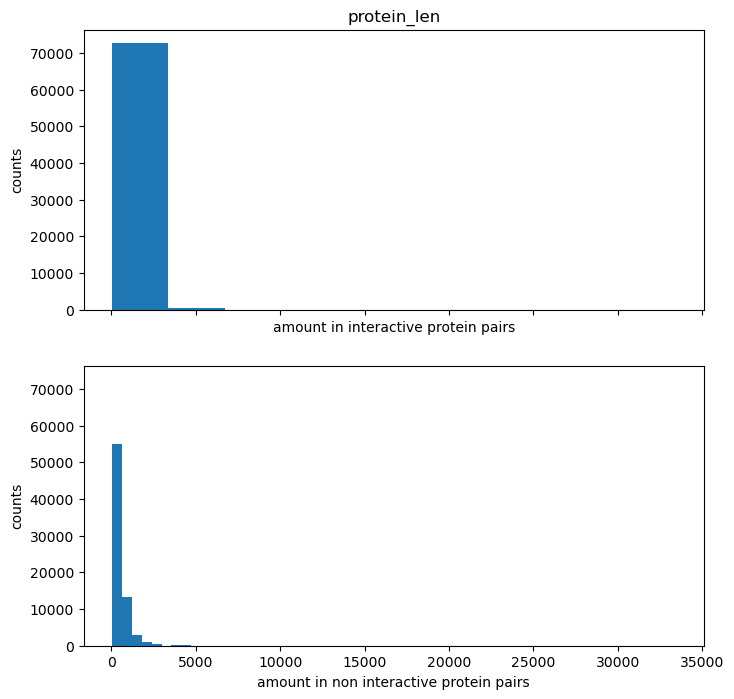

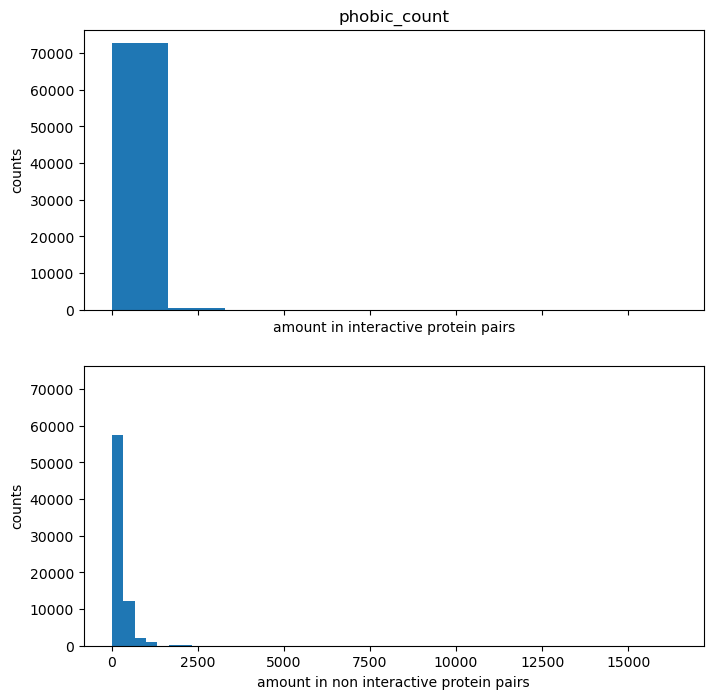

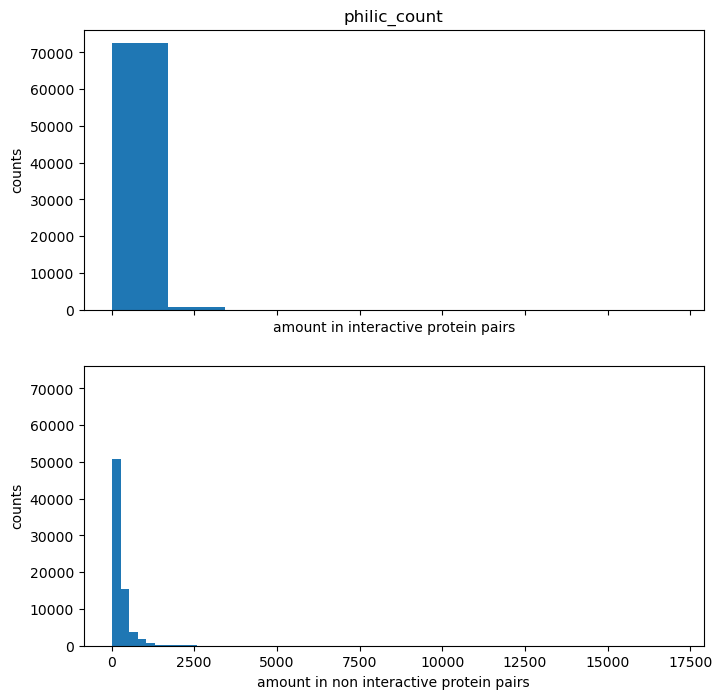

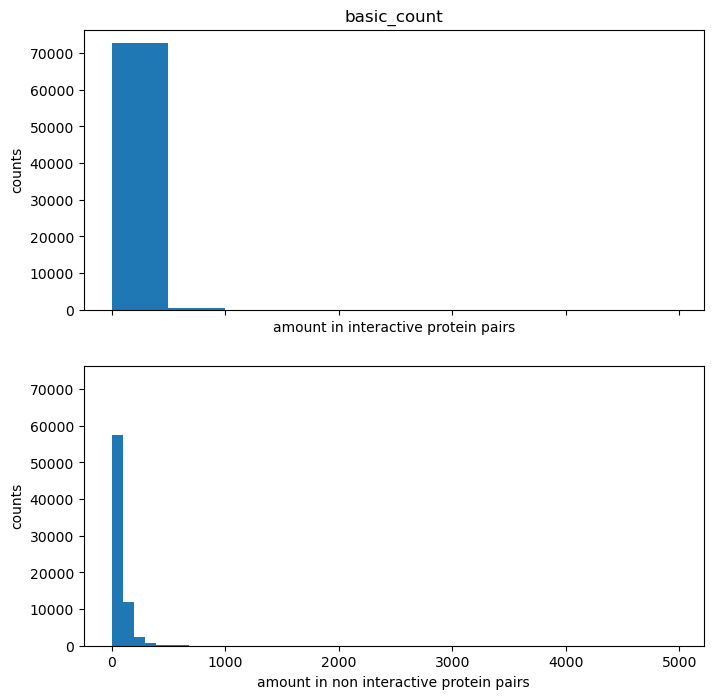

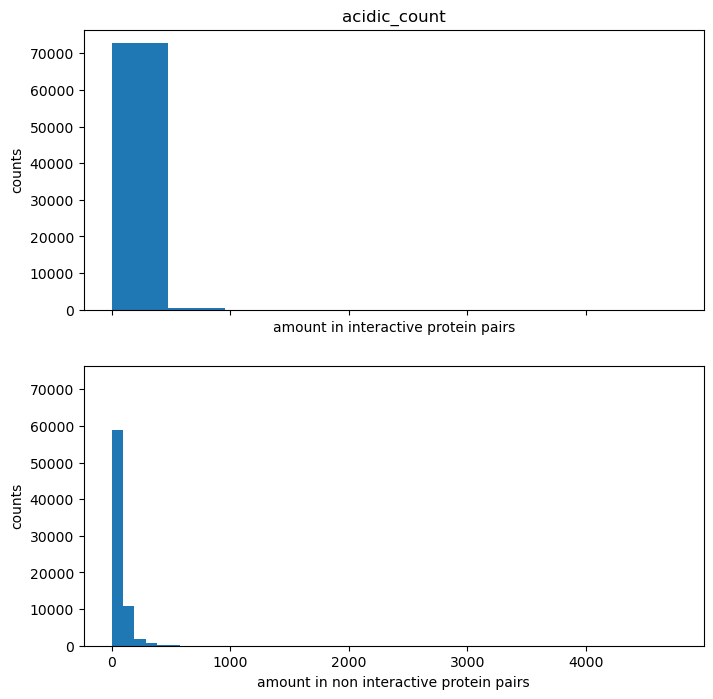

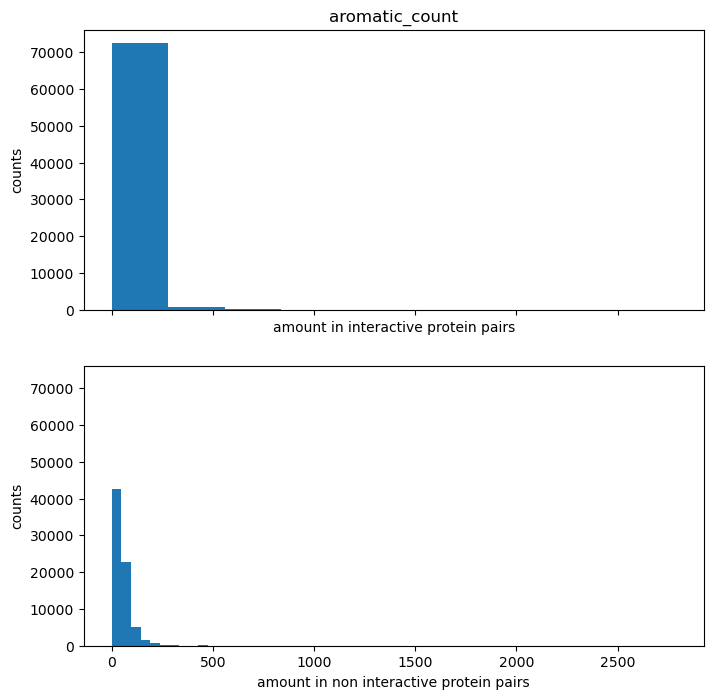

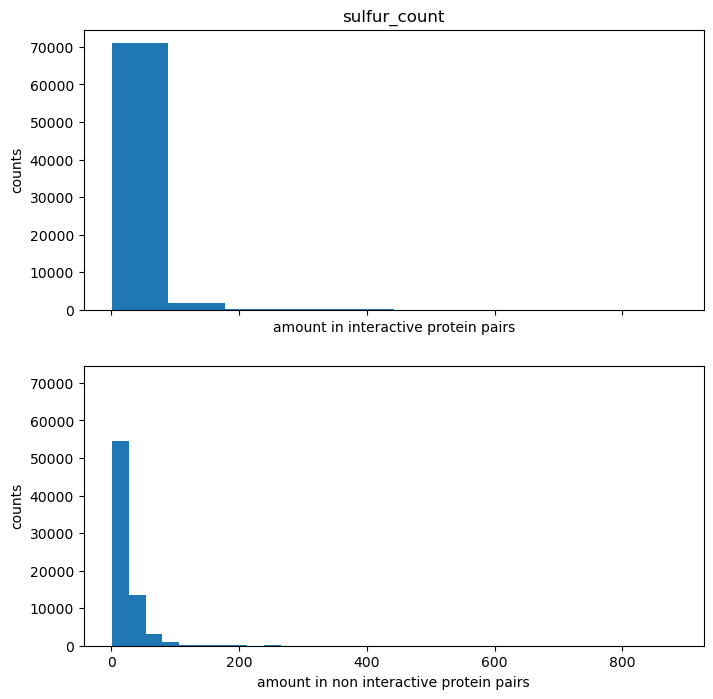

In [18]:
visualization = histogrammer(df_fe_classed)

Based on the graphings of the proteins in the interactive and non interactive groupings: it seems that there are typically a wider distribution of amino acid residue amounts in the non interactive visualizations.  There are no Gaussian distributions it appears.  Since the skew is to the left, an inverse or log transformation could change the view of the data.

# 3.) Inferential Statistics

a.) Heatmap

In [9]:
df_fe_classed.columns

Index(['protein_1_seq', 'protein_1_len', '1_phobic_count', '1_philic_count',
       '1_basic_count', '1_acidic_count', '1_aromatic_count', '1_sulfur_count',
       'protein_2_seq', 'protein_2_len', '2_phobic_count', '2_philic_count',
       '2_basic_count', '2_acidic_count', '2_aromatic_count', '2_sulfur_count',
       'protein_interaction'],
      dtype='object')

In [19]:
not_numeric = ['protein_1_seq','protein_2_seq']
numeric = [x for x in df_fe_classed.columns if x not in not_numeric]

In [20]:
corr = df_fe_classed[numeric].corr()
print (corr)

                     1_protein_len  1_phobic_count  1_philic_count  \
1_protein_len             1.000000        0.991940        0.993079   
1_phobic_count            0.991940        1.000000        0.970194   
1_philic_count            0.993079        0.970194        1.000000   
1_basic_count             0.973983        0.951939        0.980398   
1_acidic_count            0.962597        0.938374        0.971196   
1_aromatic_count          0.950171        0.948646        0.937910   
1_sulfur_count            0.874021        0.866547        0.868370   
2_protein_len             0.060246        0.061866        0.057878   
2_phobic_count            0.058528        0.060769        0.055608   
2_philic_count            0.061066        0.062084        0.059243   
2_basic_count             0.060063        0.060509        0.058785   
2_acidic_count            0.061048        0.061734        0.059535   
2_aromatic_count          0.056782        0.058986        0.053921   
2_sulfur_count      

<Axes: >

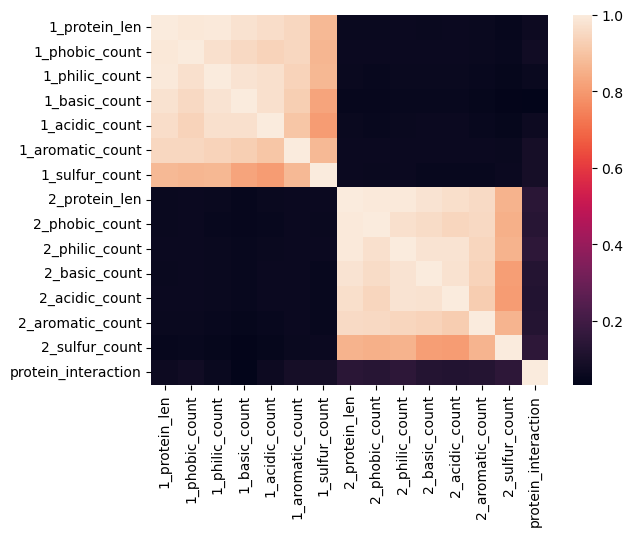

In [21]:
sns.heatmap(corr)

It seems that protein 1's compositions are highly highly correlated with all of protein 1's numeric features.  The same is true for the protein 2's numeric compositions.



b.) Chi Square Tests:

lets draft this chi square test comparing the total phobic/philic/ basic/ acidic/ aromatic/ sulfur counts in the two categories: protein interaction present vs no protein interaction present (table will be 6 x 2)

In [34]:
phobic_1 = df_fe_classed['1_phobic_count'].groupby(df_fe_classed['protein_interaction']).sum()
philic_1 = df_fe_classed['1_philic_count'].groupby(df_fe_classed['protein_interaction']).sum()
basic_1 = df_fe_classed['1_basic_count'].groupby(df_fe_classed['protein_interaction']).sum()
acidic_1 = df_fe_classed['1_acidic_count'].groupby(df_fe_classed['protein_interaction']).sum()
aromatic_1 = df_fe_classed['1_aromatic_count'].groupby(df_fe_classed['protein_interaction']).sum()
sulfur_1 = df_fe_classed['1_sulfur_count'].groupby(df_fe_classed['protein_interaction']).sum()

In [35]:
phobic_2 = df_fe_classed['2_phobic_count'].groupby(df_fe_classed['protein_interaction']).sum()
philic_2 = df_fe_classed['2_philic_count'].groupby(df_fe_classed['protein_interaction']).sum()
basic_2 = df_fe_classed['2_basic_count'].groupby(df_fe_classed['protein_interaction']).sum()
acidic_2 = df_fe_classed['2_acidic_count'].groupby(df_fe_classed['protein_interaction']).sum()
aromatic_2 = df_fe_classed['2_aromatic_count'].groupby(df_fe_classed['protein_interaction']).sum()
sulfur_2 = df_fe_classed['2_sulfur_count'].groupby(df_fe_classed['protein_interaction']).sum()

In [40]:
phobic_no = phobic_1.iloc[0] + phobic_2.iloc[0] 
phobic_yes = phobic_1.iloc[1] + phobic_2.iloc[1] 
philic_no = philic_1.iloc[0] + philic_2.iloc[0] 
philic_yes = philic_1.iloc[1] + philic_2.iloc[1] 
basic_no = basic_1.iloc[0] + basic_2.iloc[0]
basic_yes = basic_1.iloc[1] + basic_2.iloc[1]
acidic_no = acidic_1.iloc[0] + acidic_2.iloc[0]
acidic_yes = acidic_1.iloc[1] + acidic_2.iloc[1]
aromatic_no = aromatic_1.iloc[0] + aromatic_2.iloc[0]
aromatic_yes = aromatic_1.iloc[1] +aromatic_2.iloc[1]
sulfur_no = sulfur_1.iloc[0] + sulfur_2.iloc[0]
sulfur_yes= sulfur_1.iloc[1] + sulfur_2.iloc[1]

In [50]:
chi_observed = [phobic_no, phobic_yes, philic_no, philic_yes, basic_no, basic_yes, acidic_no, acidic_yes, aromatic_no, aromatic_yes, sulfur_no, sulfur_yes]

In [60]:
def exp_values(chi_observed):
    
    chi_exp = []
    odd_list = [x for x in chi_observed if chi_observed.index(x)%2 != 0]
    even_list = [y for y in chi_observed if chi_observed.index(y)%2 == 0]
    iter_list = [sum(odd_list),sum(even_list)]
    
    for z in range(6):
        
        round_val = 2*z
        no_val = ((chi_observed[round_val] + chi_observed[round_val+1])/sum(chi_observed)) * iter_list[0]
        yes_val = ((chi_observed[round_val] + chi_observed[round_val+1])/sum(chi_observed)) * iter_list[1]
        chi_exp.append(yes_val)
        chi_exp.append(no_val)
        
    return chi_exp
        

In [61]:
chi_exp = exp_values(chi_observed)

In [62]:
print (chi_exp)

[19135576.4601002, 24102243.5398998, 19873244.09858295, 25031373.90141705, 5549817.80375898, 6990281.196241021, 4908734.377892014, 6182803.622107986, 3744924.6439551967, 4716925.356044803, 1677030.6157106606, 2112306.384289339]


In [63]:
print (chi_observed)

[19087880, 24149940, 19808466, 25096152, 5708956, 6831143, 4897098, 6194440, 3746826, 4715024, 1640102, 2149235]


In [65]:
def test_value(chi_observed, chi_exp):
    
    nums = []
    
    for x in range(12):
        val = ((chi_observed[x]-chi_exp[x])**2)/(chi_exp[x])
        nums.append(val)
        
        
    test_value = sum(nums)
    
    return (test_value)

In [66]:
test_value = test_value(chi_observed, chi_exp)

In [67]:
print (test_value)

10288.150437390648


using the link below: https://www.bmj.com/sites/default/files/attachments/resources/2011/08/appendix-table-c.pdf

you see that with 5 degrees of freedom the value for a p value of .001 is 20.517; thus the null-hypothesis, that the two groups were not different, can be rejected; the alternative hypothesis (that the groups are different) can be considered


the distribution of the data may be impacting the ability of this test to tell an accurate story however

c.) z-tests for the average of all of the values within each category (phobic,philic, basic, etc.) and the classification of protein interaction present or not present

lets choose 1.96 as the test threshold for significant difference in means between the differesn groups for each category

In [68]:
df_fe_classed.head()

,protein_1_seq,1_protein_len,1_phobic_count,1_philic_count,1_basic_count,1_acidic_count,1_aromatic_count,1_sulfur_count,protein_2_seq,2_protein_len,2_phobic_count,2_philic_count,2_basic_count,2_acidic_count,2_aromatic_count,2_sulfur_count,protein_interaction
0,MESSKKMDSPGALQTNPPLKLHTDRSAGTPVFVPEQGGYKEKFVKT...,568,243,325,98,73,56,44,MARPHPWWLCVLGTLVGLSATPAPKSCPERHYWAQGKLCCQMCEPG...,260,120,140,40,25,30,26,1
1,MVMSSYMVNSKYVDPKFPPCEEYLQGGYLGEQGADYYGGGAQGADF...,255,136,119,39,20,32,10,MAENVVEPGPPSAKRPKLSSPALSASASDGTDFGSLFDLEHDLPDE...,2414,1189,1225,277,178,170,169,1
2,MNRHLWKSQLCEMVQPSGGPAADQDVLGEESPLGKPAMLHLPSEQG...,419,175,244,71,73,23,23,MEGGRRARVVIESKRNFFLGAFPTPFPAEHVELGRLGDSETAMVPG...,538,252,286,77,87,53,30,1
3,MAPPSTREPRVLSATSATKSDGEMVLPGFPDADSFVKFALGSVVAV...,885,424,461,143,114,92,32,MLFYSFFKSLVGKDVVVELKNDLSICGTLHSVDQYLNIKLTDISVT...,95,47,48,13,12,10,4,1
4,MQSGPRPPLPAPGLALALTLTMLARLASAASFFGENHLEVPVATAL...,2322,1315,1007,242,257,220,38,MQTIKCVVVGDGAVGKTCLLISYTTNKFPSEYVPTVFDNYAVTVMI...,191,99,92,25,24,18,8,1


In [90]:
def z_test(df):
    
    res_dict = {}
    
    name_list = list(df.columns)
    
    zero_len = len(df_fe_classed[df_fe_classed['protein_interaction'] == 0])
    
    one_len = len(df_fe_classed[df_fe_classed['protein_interaction'] == 1])
    
    one_indexes = []
    for x in range(len(df)):
        if df['protein_interaction'][x] == 1:
            one_indexes.append(x)
            
    zero_indexes = []
    for x in range(len(df)):
        if df['protein_interaction'][x] == 0:
            zero_indexes.append(x)
    
    for x in range(7):
        
        sub_0_1 = df.loc[zero_indexes, name_list[x+1]]
        
        sub_0_2 = df.loc[zero_indexes, name_list[x+9]]
        
        con_0 = pd.concat([sub_0_1, sub_0_2], axis=0)
        
        mean_0 = con_0.agg('mean') 
        
        var_0 = con_0.agg('var')
        
        
        sub_1_1 = df.loc[one_indexes, name_list[x+1]]
        
        sub_1_2 = df.loc[one_indexes, name_list[x+9]]
        
        con_1 = pd.concat([sub_1_1, sub_1_2], axis=0)
        
        mean_1 = con_1.agg('mean') 
        
        var_1 = con_1.agg('var')
        
        
        
        num = (mean_0-mean_1)
        den = np.sqrt((var_0**2)/len(con_0) + (var_1**2)/len(con_1))
        z_score = num/den
        
        res_dict[name_list[x+1][2:]] = z_score
        
    return res_dict
        

In [91]:
z_test = z_test(df_fe_classed)

In [92]:
print (z_test)

{'protein_len': -0.052693148789676195, 'phobic_count': -0.1095912835241247, 'philic_count': -0.09894030291565321, 'basic_count': -0.27609928513044735, 'acidic_count': -0.34500731880692176, 'aromatic_count': -0.6142270394023824, 'sulfur_count': -1.4331230113302822}


By comparing the different attributes of the different groups, the means do not seem to vary at the level of p=.05 (a z score of 1.96)

# 5.) PCA


# Summary:

In this notebook, I took the sequences of the proteins and created several features for each protein based on frequency in a kind of amino acid in the sequence.  The features created for each protein in the protein pairs of the original csv are the length of the amino acid sequence, the hydrophobic residue amount, the hydrophilic count, the basic count, the acidic count, the aromatic count, and the count of residues with sulfur within them.  Using these newly made features, I produced a new dataframe. 

The dataframe underwent a visualization in which the histograms of the different compositions were visualized.
Additionally, a heatmap correlation was provided in order to see if there were any strong correlations.
More inferential statistics that were performed included a chi-squared test and z test.  From this it was found that there was a significant difference in terms of mass summation of kinds of amino acids between the two groups.  And with the z scores, there were no scores that passed the threshold of p = .05 (or a z score of 1.96).
